In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os



sahin


In [3]:
data = pd.read_csv('heart.csv')


In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

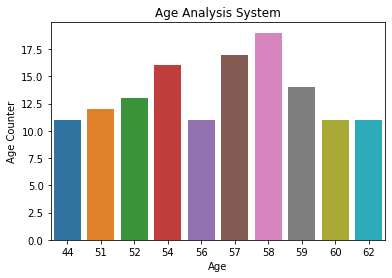

In [10]:
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

Text(0.5, 1.0, 'Relation of Age and target')

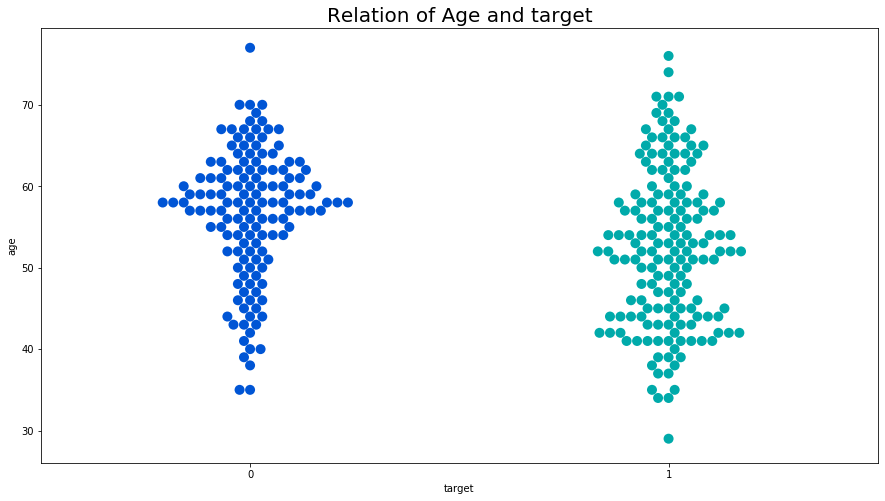

In [10]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20)

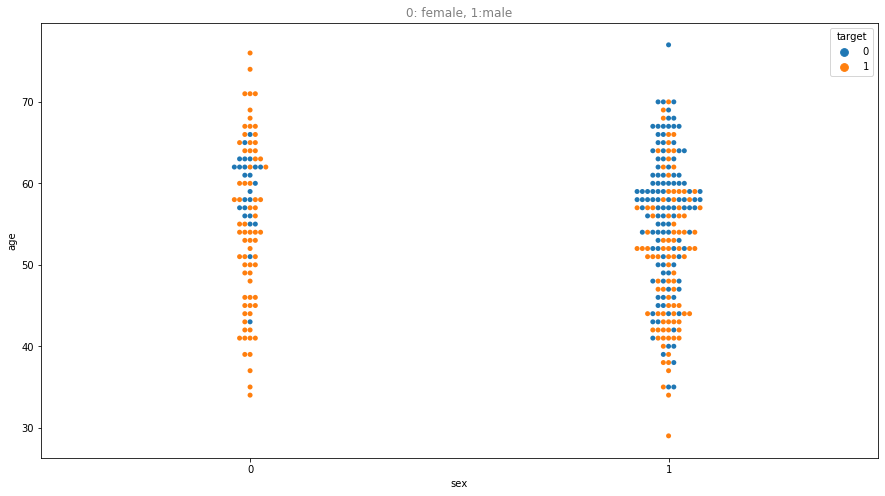

In [11]:
sns.swarmplot(x="sex", y="age", hue="target", data=data)
plt.title("0: female, 1:male",color="gray")
plt.show()

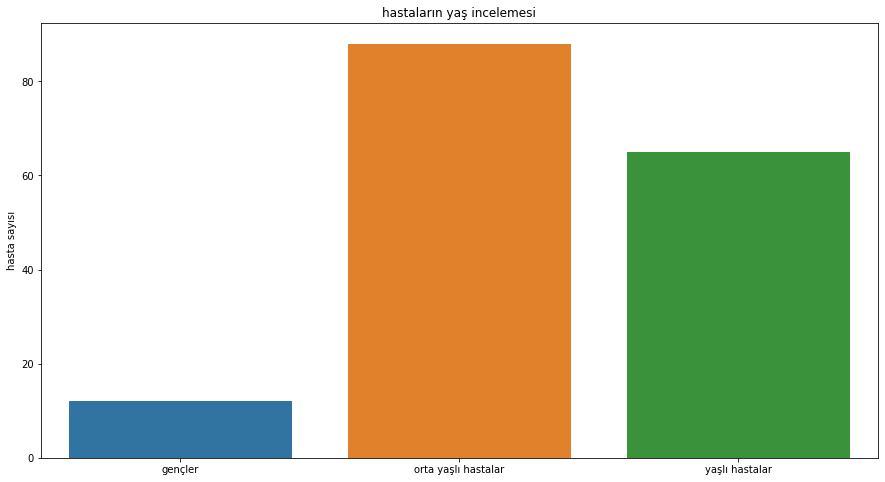

In [12]:
genc=data[((data.age>=29)&(data.age<40))&data.target==1]
orta=data[(data.age>=40)&(data.age<55)&data.target==1]
yaslı=data[(data.age>=55)&data.target==1]
sns.barplot(x=['gençler','orta yaşlı hastalar','yaşlı hastalar'],y=[len(genc),len(orta),len(yaslı)])

plt.ylabel('hasta sayısı')
plt.title('hastaların yaş incelemesi')
plt.show()


In [13]:
hastasayısı=data[data.target==1]
print(len(hastasayısı))
print(len(genc)+len(orta)+len(yaslı))

165
165


In [36]:

dizi=[58,57,54,59,52,51,62,44,60,56,64,41,63,67,55,45,42,53,61,65,43,66,50,48,46]
data['yeni']=0
data.yeni
for x in range(0,303):
    if((data.age[x]>=40)&(data.age[x]<55)):
           data.yeni[x]=1
    
data.yeni    

C:\Users\CAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      1
8      1
9      0
10     1
11     1
12     1
13     0
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     1
25     0
26     0
27     1
28     0
29     1
      ..
273    0
274    1
275    1
276    0
277    0
278    0
279    0
280    1
281    1
282    0
283    1
284    0
285    1
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    1
295    0
296    0
297    0
298    0
299    1
300    0
301    0
302    0
Name: yeni, Length: 303, dtype: int64

In [37]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

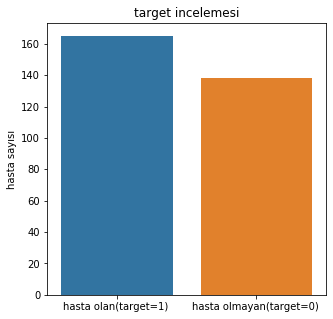

In [38]:

hasta=data[data.target==1]
hastaolmayan=data[data.target==0]
sns.barplot(x=['hasta olan(target=1) ', 'hasta olmayan(target=0) '],y=[len(hasta),len(hastaolmayan)])

plt.ylabel('hasta sayısı')
plt.title('target incelemesi')
plt.show()

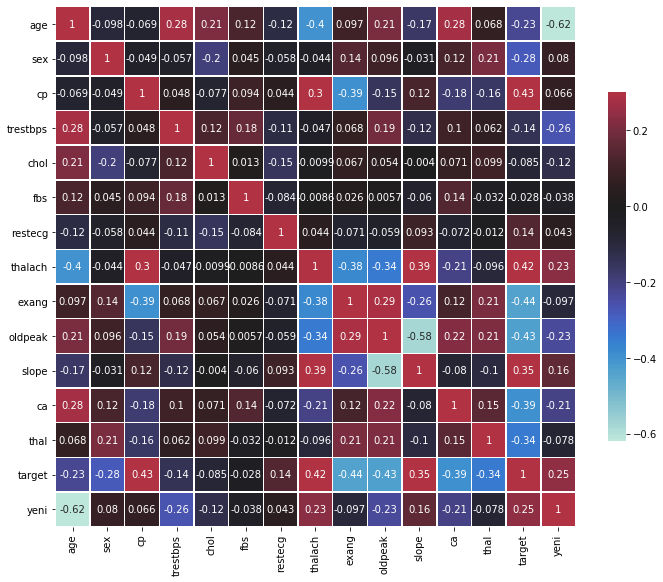

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [ ]:
x = data.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Greens')

,target
target,1
cp,0.433798
thalach,0.421741
slope,0.345877
yeni,0.245481
restecg,0.13723
fbs,-0.0280458
chol,-0.0852391
trestbps,-0.144931
age,-0.225439


In [41]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,yeni
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0


In [62]:

x=data.drop('target',axis=1)
x=x.drop('fbs',axis=1)
x=x.drop('chol',axis=1)


y=data['target']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
Scaledtrain= scaler.fit_transform(X_train)
Scaledtest= scaler.fit_transform(X_test)
X_train=Scaledtrain
X_test=Scaledtest

In [63]:
print(len(y_test))

61


Training Accuracy : 0.9090909090909091
Testing Accuracy : 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



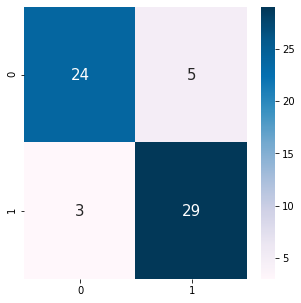

In [64]:
model = RandomForestClassifier(n_estimators = 150, max_depth = 4)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8677685950413223
Testing Accuracy : 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



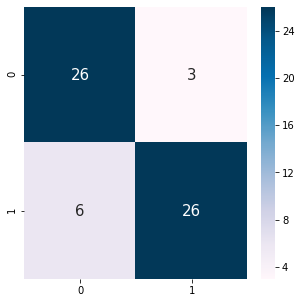

In [112]:
model2=KNeighborsClassifier(algorithm='auto', leaf_size=50,metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=3, p=2,
 weights='uniform')
model2.fit(X_train, y_train)
y_predict = model2.predict(X_test)

y_pred = model2.predict(X_test)

# evaluating the model
print("Training Accuracy :", model2.score(X_train, y_train))
print("Testing Accuracy :", model2.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8801652892561983
Testing Accuracy : 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



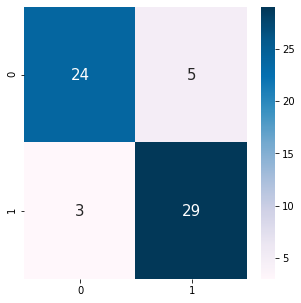

In [89]:
model3=SVC(C=23,degree=1,cache_size=150,max_iter=-1,gamma='auto')
model3.fit(X_train, y_train)
y_predict = model3.predict(X_test)

y_pred = model3.predict(X_test)

# evaluating the model
print("Training Accuracy :", model3.score(X_train, y_train))
print("Testing Accuracy :", model3.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9008264462809917
Testing Accuracy : 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



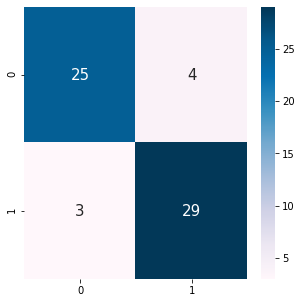

In [67]:
model4 = AdaBoostClassifier(n_estimators=25, learning_rate=1.0,)
model4.fit(X_train, y_train)
y_predict = model4.predict(X_test)

y_pred = model4.predict(X_test)

# evaluating the model
print("Training Accuracy :", model4.score(X_train, y_train))
print("Testing Accuracy :", model4.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9008264462809917
Testing Accuracy : 0.8524590163934426
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.94      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



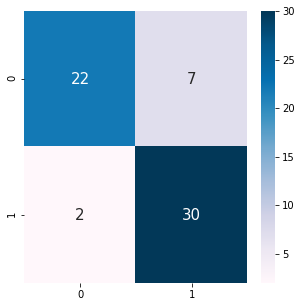

In [158]:
model5 = DecisionTreeClassifier(max_depth=5,min_samples_split=6,min_samples_leaf=1)
model5.fit(X_train, y_train)
y_predict = model5.predict(X_test)

y_pred = model5.predict(X_test)

# evaluating the model
print("Training Accuracy :", model5.score(X_train, y_train))
print("Testing Accuracy :", model5.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30,150],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)


C:\Users\CAN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)